In [1]:
import os
import pandas as pd
import numpy as np
from ipynb.fs.full.Functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#importing the data
palm_ffb = pd.read_csv('../data/palm_ffb.csv',parse_dates=['Date'])
palm_ffb.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,2008-01-02,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,2008-01-03,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,2008-01-04,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,2008-01-05,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
#looking into palm_ffb data and finding the datatypes & number of non-null rows
palm_ffb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           130 non-null    datetime64[ns]
 1   SoilMoisture   130 non-null    float64       
 2   Average_Temp   130 non-null    float64       
 3   Min_Temp       130 non-null    float64       
 4   Max_Temp       130 non-null    float64       
 5   Precipitation  130 non-null    float64       
 6   Working_days   130 non-null    int64         
 7   HA_Harvested   130 non-null    float64       
 8   FFB_Yield      130 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.3 KB


In [4]:
#Finding total number of missing values in each features
palm_ffb.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

In [5]:
palm_ffb.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


#### Using "Describe" function we can find out about some general information on our dataset. we can obtain information such as mean,std,min,max which can be useful for further analysis  

In [6]:
palm_ffb.corr()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


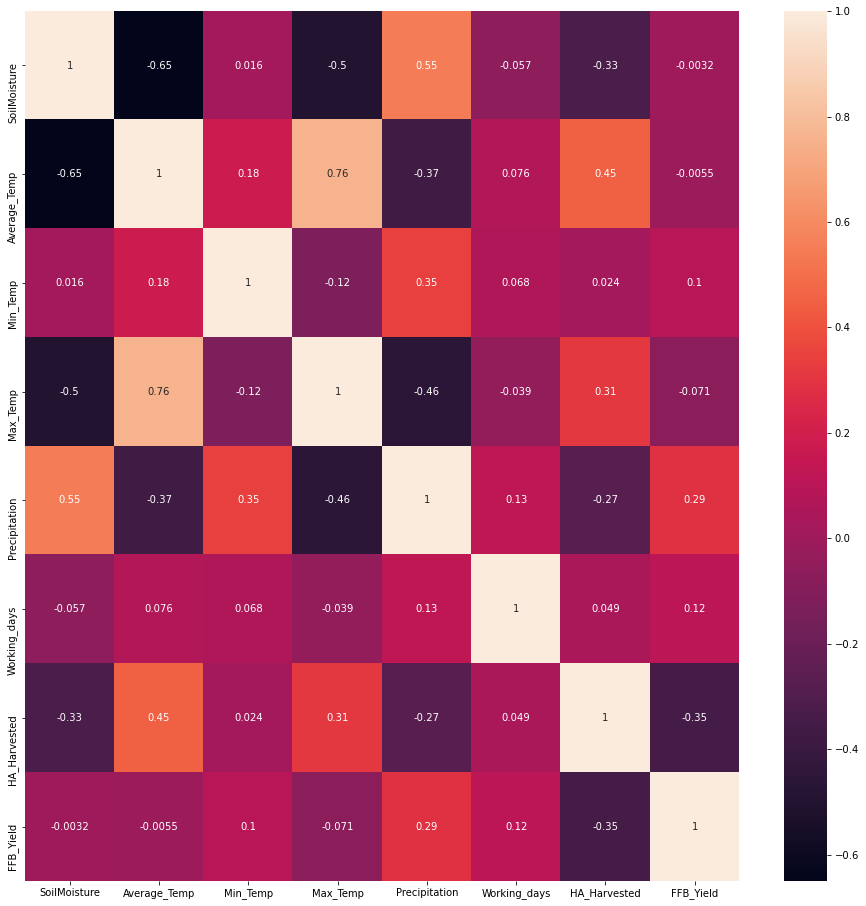

In [7]:
plt.figure(figsize=(16,16))
sns.heatmap(palm_ffb.corr(),annot=True)

Heatmap above shows that "SoilMoisture" has high negative correlations with "Average_Temp" and "HA_Harvested", meaning if one increase the other will most likely decrease. On the other hand "SoilMoisture" with "Precipitation" have high positve correlations meaning if "SoilMoisture" increases "Precipitation" also most likely will increase.

In [8]:
#In order to do further analysis,Date is broken down into 3 more columns 
palm_ffb["Year"] = palm_ffb["Date"].apply(lambda x: x.year)
palm_ffb["Month"] = palm_ffb["Date"].apply(lambda x: x.day)
palm_ffb["Day"] = palm_ffb["Date"].apply(lambda x: x.month)

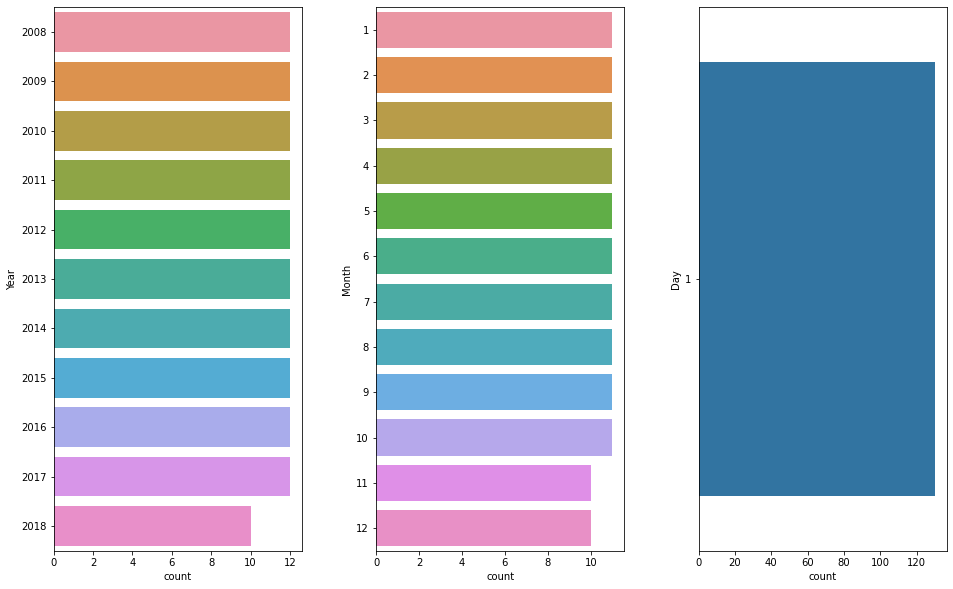

In [9]:
cols = ['Year','Month','Day']
count_plots(palm_ffb,cols,3,'y')

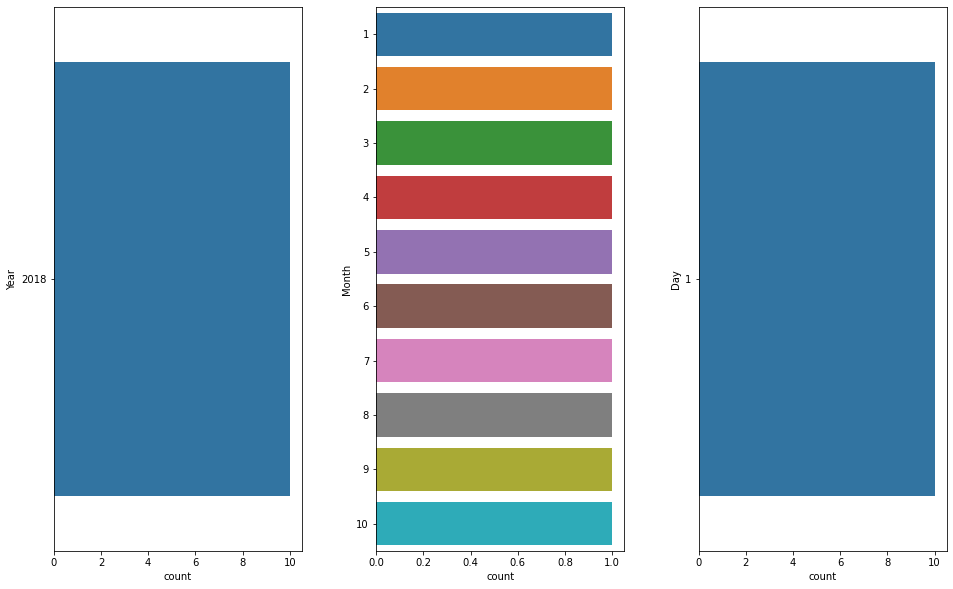

In [10]:
count_plots(palm_ffb[palm_ffb['Year']==2018],cols,3,'y')

Date format is assumed to be year-day-month for the plot above. 
The given data is from 2008 to 2018 with only data for January. 2008 to 2017 has all months in a year and 2018 has only first 10 months data.

In [11]:
palm_ffb.drop(['Date'],axis=1, inplace=True)

From yearly analysis we can see that on 2018 we have data until October lets look into the data yearly and working days

In [12]:
def count_plot_yearly2(df,title=None,figsize=(17,17), suptitle_y=0.95):
    fig, axs=plt.subplots(4,3, figsize=figsize)
    sns.countplot(x=df['Working_days'], data=df[df['Year']==2008],ax=axs[0][0])
    sns.countplot(x=df['Working_days'], data=df[df['Year']==2009],ax=axs[0][1])
    sns.countplot(x=df['Working_days'], data=df[df['Year']==2010],ax=axs[0][2])
    sns.countplot(x=df['Working_days'], data=df[df['Year']==2011],ax=axs[1][0])
    sns.countplot(x=df['Working_days'], data=df[df['Year']==2012],ax=axs[1][1])
    sns.countplot(x=df['Working_days'], data=df[df['Year']==2013],ax=axs[1][2])
    sns.countplot(x=df['Working_days'], data=df[df['Year']==2014],ax=axs[2][0])
    sns.countplot(x=df['Working_days'], data=df[df['Year']==2015],ax=axs[2][1])
    sns.countplot(x=df['Working_days'], data=df[df['Year']==2016],ax=axs[2][2])
    sns.countplot(x=df['Working_days'], data=df[df['Year']==2017],ax=axs[3][0])
    sns.countplot(x=df['Working_days'], data=df[df['Year']==2018],ax=axs[3][1])


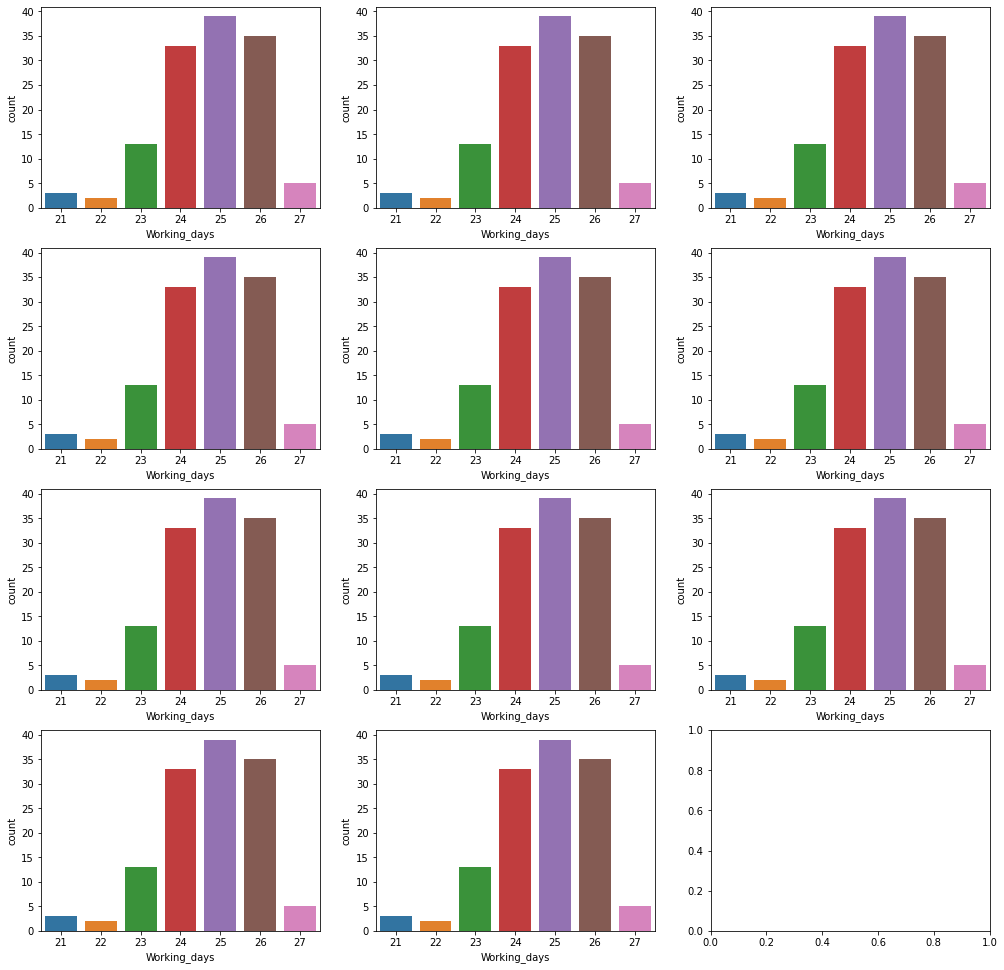

In [13]:
cols = ['Working_days']
count_plot_yearly2(palm_ffb)

Pattern of working days us the same for every year. Therefore, it can be concluded that 25 days is highest number.

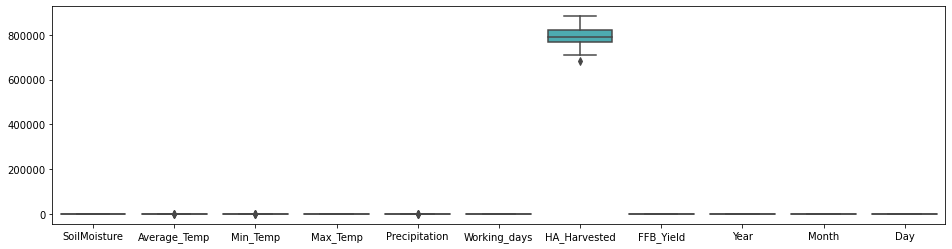

In [14]:
plt.figure(figsize=(16, 4))
sns.boxplot(data = palm_ffb)

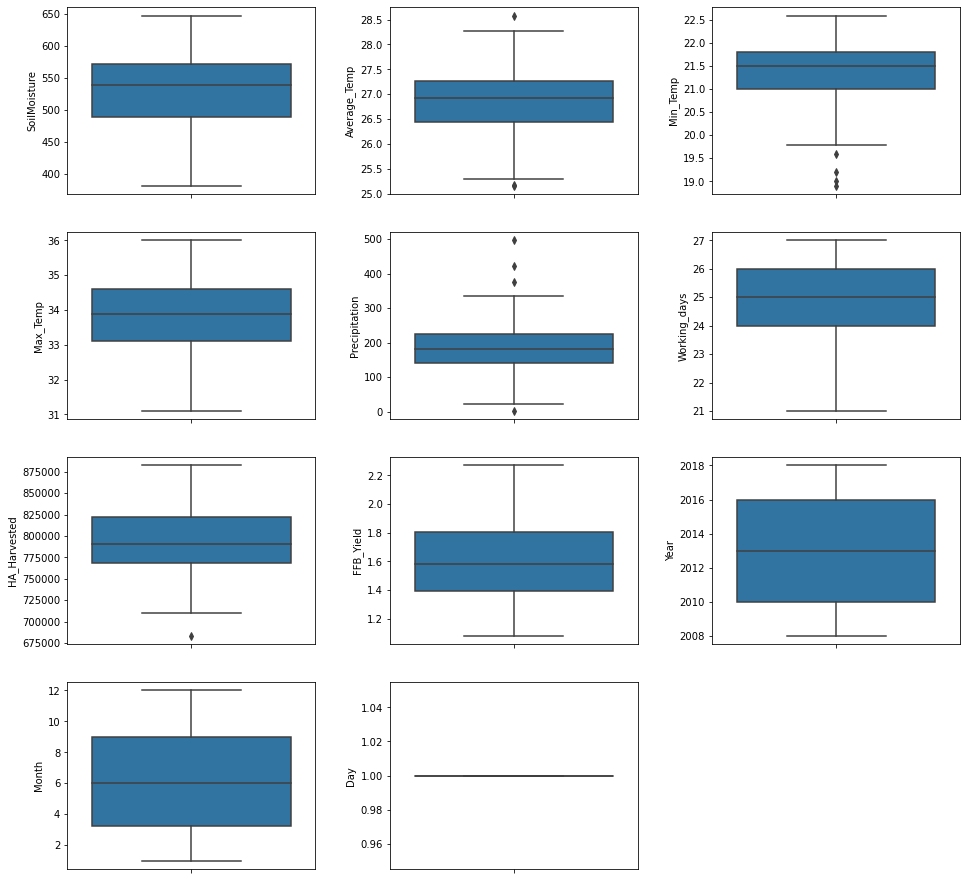

In [15]:
# cols = ['SoilMoisture','Average_Temp','Min_Temp','Max_Temp','Precipitation','Working_days','HA_Harvested','FFB_Yield']
box_plots(palm_ffb,palm_ffb.columns,3,'y',title=None,figsize=(16,20))

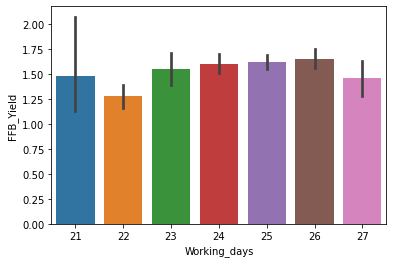

In [16]:
sns.barplot(x=palm_ffb['Working_days'],y=palm_ffb['FFB_Yield'])

Based on graph above, higher number of working days does not necessary contribute to high FFB-yield.

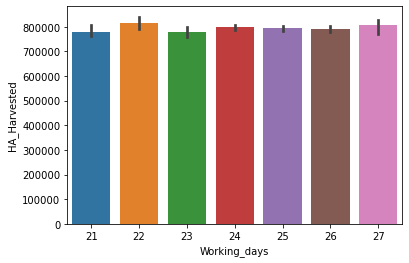

In [17]:
sns.barplot(x=palm_ffb['Working_days'],y=palm_ffb['HA_Harvested'])

The HA_Harvested amount is almost the same for different working days.

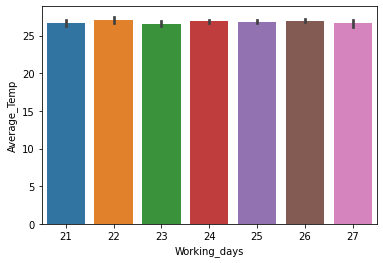

In [18]:
sns.barplot(x=palm_ffb['Working_days'],y=palm_ffb['Average_Temp'])

The Average_Temp amount is almost the same for different working days.

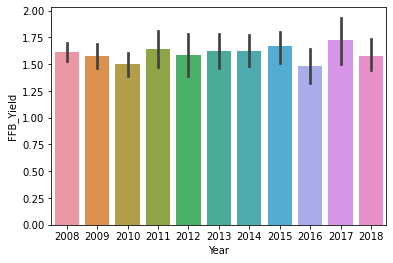

In [19]:
sns.barplot(x=palm_ffb['Year'],y=palm_ffb['FFB_Yield'])

Figure above shows the yearly FFB_Yeild where on 2016 we have the lowest FFB_Yield 

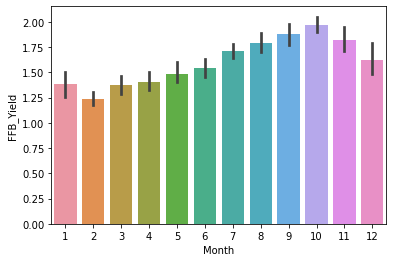

In [20]:
sns.barplot(x=palm_ffb['Month'],y=palm_ffb['FFB_Yield'])

Figure above shows the Monthly FFB_Yeild where it shows that seond half of the year has higher FFB_Yeild than first half

In [21]:
palm_ffb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SoilMoisture   130 non-null    float64
 1   Average_Temp   130 non-null    float64
 2   Min_Temp       130 non-null    float64
 3   Max_Temp       130 non-null    float64
 4   Precipitation  130 non-null    float64
 5   Working_days   130 non-null    int64  
 6   HA_Harvested   130 non-null    float64
 7   FFB_Yield      130 non-null    float64
 8   Year           130 non-null    int64  
 9   Month          130 non-null    int64  
 10  Day            130 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 11.3 KB


## Feature Selections

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression

# Spliting the data into features & target

x = palm_ffb.drop(columns=['FFB_Yield'])
y = palm_ffb['FFB_Yield']

In [23]:
#Break the data into Train , test and validation set
xtrain, xtest, ytrain, ytest = train_test_split(x, y,random_state=666, test_size=0.20)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain,random_state=666, test_size=0.10)

In [24]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
def randForest(xtrain, ytrain):
    # Building and fitting my_forest
    forest = RandomForestRegressor(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 50, random_state = 666)
    randforest = forest.fit(xtrain, ytrain)
    return randforest
    
randforest = randForest(xtrain, ytrain)

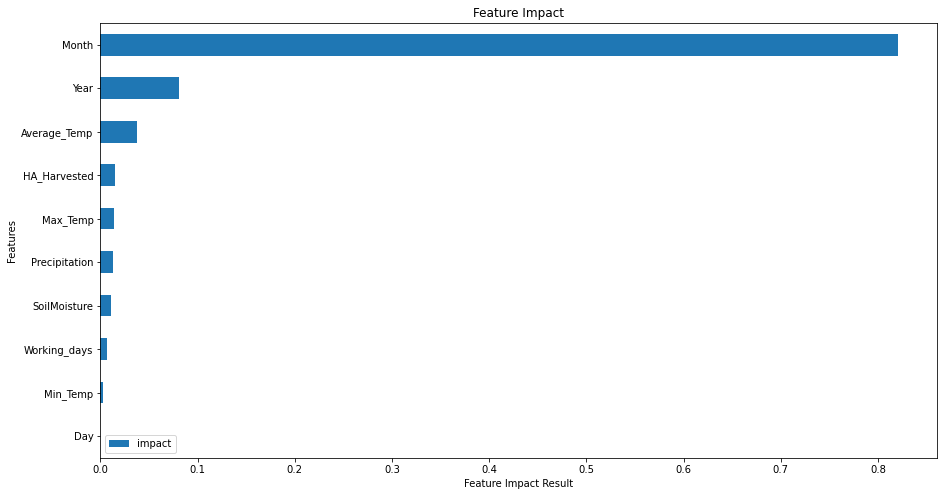

Mean Absolute Error: 0.24974650181678307
Mean Squared Error: 0.09275144910713173
Root Mean Squared Error: 0.3045512257521413


In [25]:
def randforestplot(randforest, xval, yval):
    y_pred_class = randforest.predict(xval)
    impact_feature = pd.DataFrame({'impact':randforest.feature_importances_})    
    impact_feature['Features'] = xtrain.columns
    impact_feature.sort_values(by='impact', ascending=False, inplace=True)
    impact_feature = impact_feature.iloc[:xtrain.shape[1]]
    
    impact_feature.sort_values(by='impact', inplace=True)
    impact_feature = impact_feature.set_index('Features', drop=True)
    impact_feature.plot.barh(title='Feature Impact', figsize=(15,8))
    plt.xlabel('Feature Impact Result')
    plt.show()
    
    from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(yval, y_pred_class))
    print('Mean Squared Error:', metrics.mean_squared_error(yval, y_pred_class))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yval, y_pred_class)))
randforestplot(randforest, xval, yval)

Figure above shows the external factors affecting FFB_Yield and their impact level.